In [7]:
import pandas as pd

In [8]:
bm_data = pd.read_csv('gist-baemin.csv')
bm_data

,Unnamed: 0,storeNo,name,lat,lng,address
0,0,13655029,바른국밥 첨단점,35.211722,126.837374,광주광역시 광산구 첨단내촌로 56 1층(월계동)
1,1,13701546,록시드갸토 첨단아크레타점,35.214249,126.846429,"광주광역시 광산구 임방울대로800번길 71 아크레타 첨단1층 105,106호(월계동)"
2,2,10646557,크리스피크림도넛 광주첨단점,35.217221,126.842457,"광주광역시 광산구 월계동 867-1 1층 113,114(일부)호 (월계동, 첨단센츄..."
3,3,13414085,인끼밥상,35.218221,126.845623,"광주광역시 광산구 쌍암동 669-4 (쌍암동,105.106호(1층))"
4,4,13911414,챙길 밥 첨단신도시점,35.210916,126.837069,광주광역시 광산구 첨단내촌로 45-4 1층(월계동)
...,...,...,...,...,...,...
2041,2041,13203939,쏘핫 마라탕&마라샹궈,35.206500,126.859484,광주광역시 북구 첨단연신로91번길 44 대성빌딩 1층 108호(신용동)
2042,2042,13447691,까로치아 첨단점,35.211305,126.838069,광주광역시 광산구 월계동 835-4 1층(월계동)
2043,2043,13885594,하이덮밥,35.203890,126.870372,"광주광역시 북구 양산제로 109-7 , 1층(연제동)"
2044,2044,13203939,쏘핫 마라탕&마라샹궈,35.206500,126.859484,광주광역시 북구 첨단연신로91번길 44 대성빌딩 1층 108호(신용동)


In [9]:
bm_data_latlng = bm_data[['lat','lng']]

In [10]:
bm_data_latlng

,lat,lng
0,35.211722,126.837374
1,35.214249,126.846429
2,35.217221,126.842457
3,35.218221,126.845623
4,35.210916,126.837069
...,...,...
2041,35.206500,126.859484
2042,35.211305,126.838069
2043,35.203890,126.870372
2044,35.206500,126.859484


In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

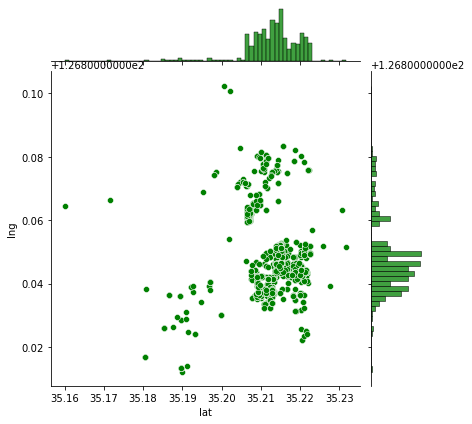

In [12]:
sns.jointplot(x=bm_data_latlng['lat'],y=bm_data_latlng['lng'],color='green',kind='scatter')

In [72]:
from sklearn.cluster import KMeans

In [73]:
ks = range(1,100)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(bm_data_latlng)
    inertias.append(model.inertia_)
    if k%10 == 0:
        print(str(k/10)+"% complete")


1.0% complete
2.0% complete
3.0% complete
4.0% complete
5.0% complete
6.0% complete
7.0% complete
8.0% complete
9.0% complete


In [13]:
# Plot ks vs inertias
plt.figure(figsize=(100, 20))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

NameError: name 'ks' is not defined

<Figure size 7200x1440 with 0 Axes>

In [14]:
# K-means 모델과 군집 예측값을 생성

# 클러스터 모델 생성, 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters=50)

clust_model.fit(bm_data_latlng)

centers = clust_model.cluster_centers_
pred =  clust_model.predict(bm_data_latlng)

print(pd.DataFrame(centers))
print(pred[:15])

            0           1
0   35.218975  126.845136
1   35.209160  126.868205
2   35.209191  126.839777
3   35.197043  126.839997
4   35.210472  126.877059
5   35.180530  126.816932
6   35.206737  126.860138
7   35.211772  126.833553
8   35.214210  126.843679
9   35.215043  126.851159
10  35.219957  126.832098
11  35.160006  126.864456
12  35.222417  126.849483
13  35.212759  126.838632
14  35.221410  126.876807
15  35.191016  126.827421
16  35.220682  126.844209
17  35.201446  126.901563
18  35.207198  126.862669
19  35.210247  126.842246
20  35.209366  126.836555
21  35.189908  126.813245
22  35.214798  126.845970
23  35.221137  126.824118
24  35.205345  126.871520
25  35.187232  126.836435
26  35.212996  126.836455
27  35.199945  126.829959
28  35.218626  126.840868
29  35.221281  126.852427
30  35.231242  126.857381
31  35.216778  126.848914
32  35.210523  126.880001
33  35.219311  126.836074
34  35.211433  126.847774
35  35.212438  126.870129
36  35.210977  126.837653
37  35.19775

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scale = scaler.fit_transform(bm_data_latlng)

k = 50

model = KMeans(n_clusters=k,random_state=10)

model.fit(data_scale)
bm_data_latlng['cluster'] = model.fit_predict(data_scale)

bm_data_latlng

/var/folders/tp/dcr77srx31sfjt_0ldrqb0hh0000gn/T/ipykernel_5077/3277573262.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm_data_latlng['cluster'] = model.fit_predict(data_scale)


,lat,lng,cluster
0,35.211722,126.837374,5
1,35.214249,126.846429,8
2,35.217221,126.842457,40
3,35.218221,126.845623,49
4,35.210916,126.837069,42
...,...,...,...
2041,35.206500,126.859484,4
2042,35.211305,126.838069,5
2043,35.203890,126.870372,18
2044,35.206500,126.859484,4


In [28]:
clust_df = bm_data_latlng.copy()
clust_df['clust'] = pred
clust_df

,lat,lng,cluster,clust
0,35.211722,126.837374,5,36
1,35.214249,126.846429,8,22
2,35.217221,126.842457,40,41
3,35.218221,126.845623,49,0
4,35.210916,126.837069,42,36
...,...,...,...,...
2041,35.206500,126.859484,4,6
2042,35.211305,126.838069,5,36
2043,35.203890,126.870372,18,24
2044,35.206500,126.859484,4,6


In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [30]:
standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(clust_df.iloc[:,0:4]), columns=clust_df.iloc[:,0:4].columns)

In [31]:
clust_model.fit(scaled_df)

centers_s = clust_model.cluster_centers_
pred_s = clust_model.predict(scaled_df)

In [32]:
clust_df['clust_s'] = pred_s
clust_df

,lat,lng,cluster,clust,clust_s
0,35.211722,126.837374,5,36,12
1,35.214249,126.846429,8,22,14
2,35.217221,126.842457,40,41,31
3,35.218221,126.845623,49,0,28
4,35.210916,126.837069,42,36,5
...,...,...,...,...,...
2041,35.206500,126.859484,4,6,2
2042,35.211305,126.838069,5,36,12
2043,35.203890,126.870372,18,24,36
2044,35.206500,126.859484,4,6,2


In [33]:
cluster_mean = clust_df.groupby('clust').mean()
cluster_mean.to_csv('clustered.csv',mode='w',index=False)
len(cluster_mean)

50

In [34]:
clust_df = clust_df.sort_values('clust')
bm_data_latlng


,lat,lng,cluster
0,35.211722,126.837374,5
1,35.214249,126.846429,8
2,35.217221,126.842457,40
3,35.218221,126.845623,49
4,35.210916,126.837069,42
...,...,...,...
2041,35.206500,126.859484,4
2042,35.211305,126.838069,5
2043,35.203890,126.870372,18
2044,35.206500,126.859484,4


In [35]:
clust_df.sort_values('clust')
clust_count = [0]*50

for i in range(len(clust_df)):
    clust_num = int(clust_df.iloc[i]['clust'])
    clust_count[clust_num-1] = clust_count[clust_num-1] + 1

ccdf = pd.DataFrame(clust_count)
ccdf.to_csv('clusterCount.csv',mode='w',index=False)

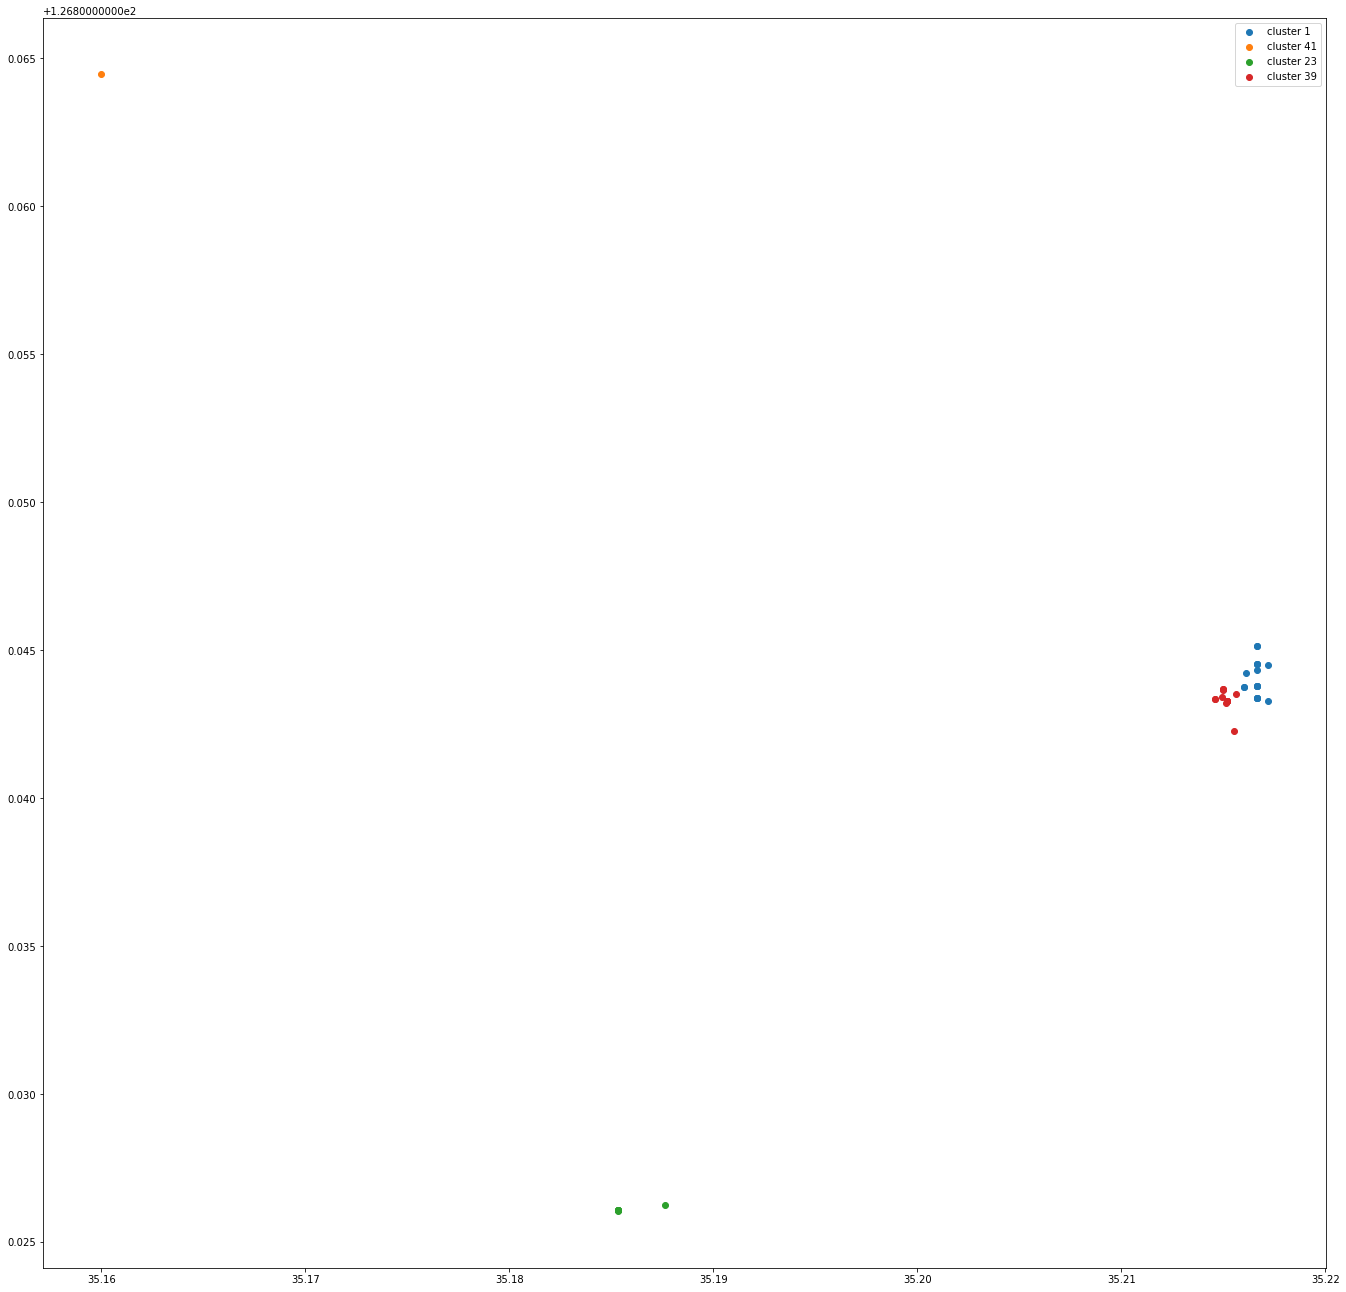

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (23, 23))

for i in [1,41,23,39]:
    plt.scatter(bm_data_latlng.loc[bm_data_latlng['cluster']==i,'lat'],bm_data_latlng.loc[bm_data_latlng['cluster']==i,'lng'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.show()